Accuracy: 0.8892935178441369
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     10968
           1       0.51      0.51      0.51      1389

    accuracy                           0.89     12357
   macro avg       0.72      0.73      0.72     12357
weighted avg       0.89      0.89      0.89     12357

Confusion Matrix:
 [[10275   693]
 [  675   714]]


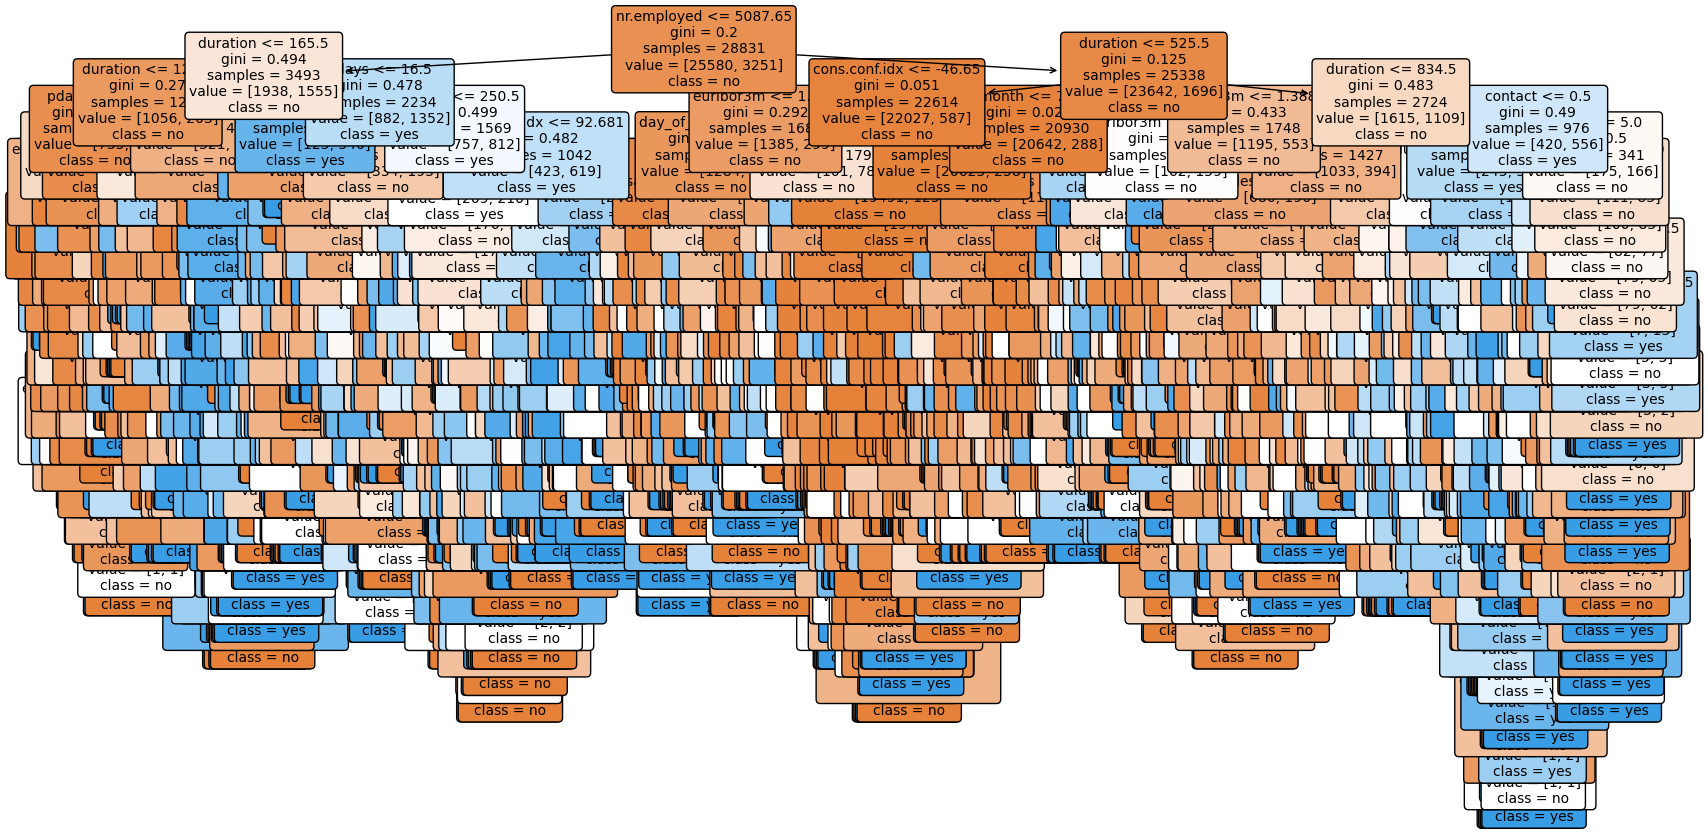

Tuned Accuracy: 0.9163227320547058
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10968
           1       0.66      0.52      0.58      1389

    accuracy                           0.92     12357
   macro avg       0.80      0.75      0.77     12357
weighted avg       0.91      0.92      0.91     12357

Tuned Confusion Matrix:
 [[10595   373]
 [  661   728]]


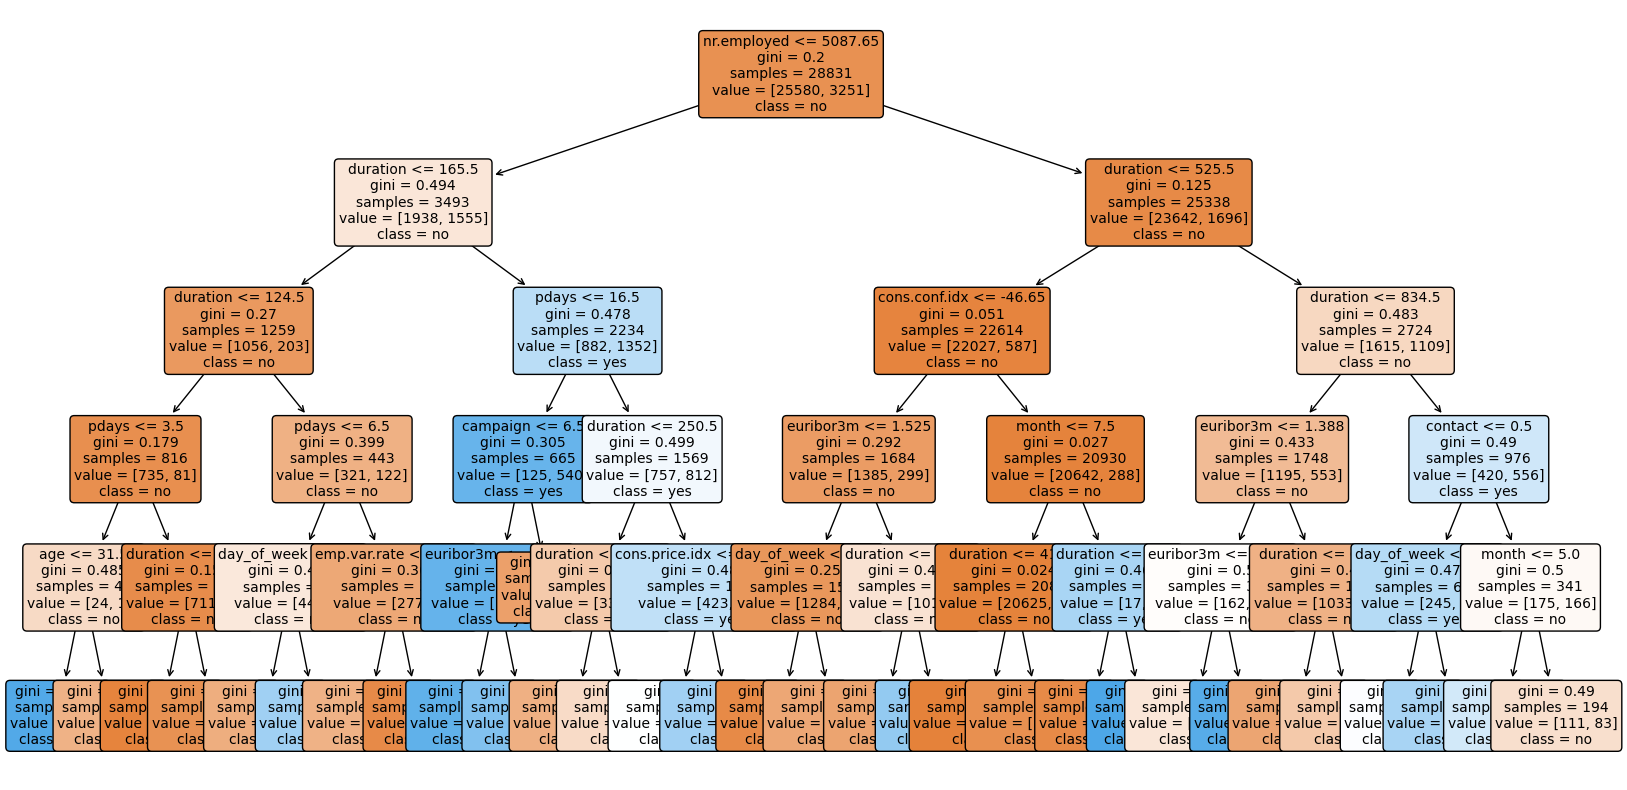

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree

# Load the dataset
url = 'bank-additional-full.csv'
data = pd.read_csv(url, sep=';')

# Display the first few rows of the dataset
data.head()

# Encode categorical features using LabelEncoder
label_encoder = LabelEncoder()

# List of categorical columns
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 
                       'contact', 'month', 'day_of_week', 'poutcome']

# Apply LabelEncoder to categorical columns
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

# Encode the target variable
data['y'] = label_encoder.fit_transform(data['y'])

# Display the first few rows after encoding
data.head()

# Define features and target variable
X = data.drop('y', axis=1)
y = data['y']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shapes of the datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Generate the classification report
print(classification_report(y_test, y_pred))

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

# Plot the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, feature_names=X.columns.tolist(), class_names=['no', 'yes'], rounded=True, fontsize=10)
plt.show()

# Initialize the Decision Tree classifier with some hyperparameters
clf_tuned = DecisionTreeClassifier(max_depth=5, min_samples_split=20, random_state=42)

# Train the classifier
clf_tuned.fit(X_train, y_train)

# Make predictions on the test set
y_pred_tuned = clf_tuned.predict(X_test)

# Evaluate the model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f'Tuned Accuracy: {accuracy_tuned}')

# Generate the classification report
print(classification_report(y_test, y_pred_tuned))

# Generate the confusion matrix
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)
print('Tuned Confusion Matrix:\n', conf_matrix_tuned)

# Plot the tuned decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf_tuned, filled=True, feature_names=X.columns.tolist(), class_names=['no', 'yes'], rounded=True, fontsize=10)
plt.show()
